In [133]:
import os
import numpy as np  #mathematical calculation
import pandas as pd # data manipulations
import matplotlib.pyplot as plt #data visuliasation
import seaborn as sns  #data visuliasation
sns.set
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [134]:
#by default controlling height and width of plot
#by default controlling height and width of plot

In [135]:
USAHOUSING = pd.read_csv('USA_Housing.csv')

In [136]:
USAHOUSING.head() #Display only first 5 rows

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [124]:
USAHOUSING.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [125]:
USAHOUSING.columns=USAHOUSING.columns.str.replace(' ', '_' )

In [126]:
USAHOUSING.columns

Index(['Avg._Area_Income', 'Avg._Area_House_Age', 'Avg._Area_Number_of_Rooms',
       'Avg._Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [127]:
USAHOUSING.columns=USAHOUSING.columns.str.replace('.', '')

In [128]:
USAHOUSING.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [129]:
USAHOUSING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Avg_Area_Income              4990 non-null   float64
 1   Avg_Area_House_Age           5000 non-null   float64
 2   Avg_Area_Number_of_Rooms     4995 non-null   float64
 3   Avg_Area_Number_of_Bedrooms  4994 non-null   float64
 4   Area_Population              5000 non-null   float64
 5   Price                        5000 non-null   float64
 6   Address                      5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [130]:
USAHOUSING.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [131]:
#for i in USAHOUSING.columns:
 #  print("***************", i, "***************")
  #  print()
   # print(set(USAHOUSING[i].tolist()))

# LABEL ENCODING


In [132]:
USAHOUSING['Address'] = USAHOUSING['Address'].astype('category')
USAHOUSING['Address'] = USAHOUSING['Address'].cat.codes

In [20]:
USAHOUSING['Address'] # here you can see all values change to integer.

0        962
1        863
2       4069
3       4794
4       4736
        ... 
4995    4750
4996    4636
4997    1897
4998    4833
4999    1703
Name: Address, Length: 5000, dtype: int16

In [21]:
USAHOUSING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Avg_Area_Income              4990 non-null   float64
 1   Avg_Area_House_Age           5000 non-null   float64
 2   Avg_Area_Number_of_Rooms     4995 non-null   float64
 3   Avg_Area_Number_of_Bedrooms  4994 non-null   float64
 4   Area_Population              5000 non-null   float64
 5   Price                        5000 non-null   float64
 6   Address                      5000 non-null   int16  
dtypes: float64(6), int16(1)
memory usage: 244.3 KB


# ANOVA TESTING TO CHECK SIGNIFICANT VARIABLE

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price ~ Address', data=USAHOUSING).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price ~ Avg_Area_Income', data=USAHOUSING).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                       sum_sq      df            F  PR(>F)
Avg_Area_Income  2.546601e+14     1.0  3455.920442     0.0
Residual         3.675561e+14  4988.0          NaN     NaN


In [25]:
import statsmodels.api
from statsmodels.formula.api import ols
model = ols('Price ~ Area_Population', data = USAHOUSING).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                       sum_sq      df            F         PR(>F)
Area_Population  1.040459e+14     1.0  1001.408749  1.736392e-200
Residual         5.192897e+14  4998.0          NaN            NaN


In [26]:
import statsmodels.api
from statsmodels.formula.api import ols
model = ols('Price ~ Avg_Area_House_Age', data = USAHOUSING).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                          sum_sq      df            F         PR(>F)
Avg_Area_House_Age  1.276559e+14     1.0  1287.169756  4.944750e-251
Residual            4.956797e+14  4998.0          NaN            NaN


In [27]:
USAHOUSING.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03,5000.000000
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06,2499.500000
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05,1443.520003
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.000000
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05,1249.750000
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06,2499.500000
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06,3749.250000
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06,4999.000000


In [28]:
USAHOUSING.isnull().sum()

Avg_Area_Income                10
Avg_Area_House_Age              0
Avg_Area_Number_of_Rooms        5
Avg_Area_Number_of_Bedrooms     6
Area_Population                 0
Price                           0
Address                         0
dtype: int64

In [29]:
USAHOUSING.isnull().sum()/len(USAHOUSING)*100

Avg_Area_Income                0.20
Avg_Area_House_Age             0.00
Avg_Area_Number_of_Rooms       0.10
Avg_Area_Number_of_Bedrooms    0.12
Area_Population                0.00
Price                          0.00
Address                        0.00
dtype: float64

# Check outliers and BOX PLOTS

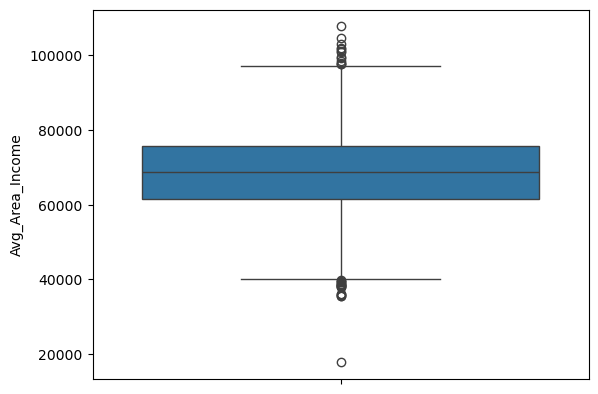

In [31]:
sns.boxplot(y = 'Avg_Area_Income' , data=USAHOUSING)
plt.show()

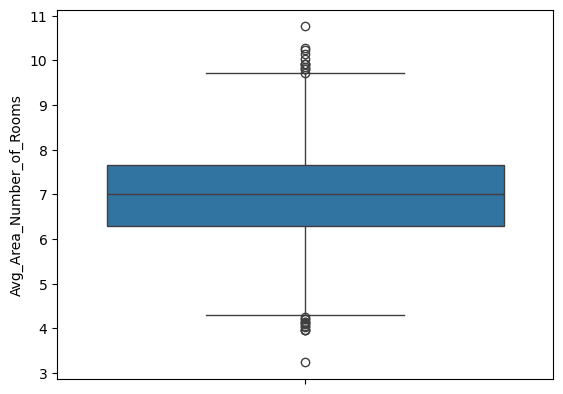

In [32]:
sns.boxplot(y = 'Avg_Area_Number_of_Rooms' , data=USAHOUSING)
plt.show()

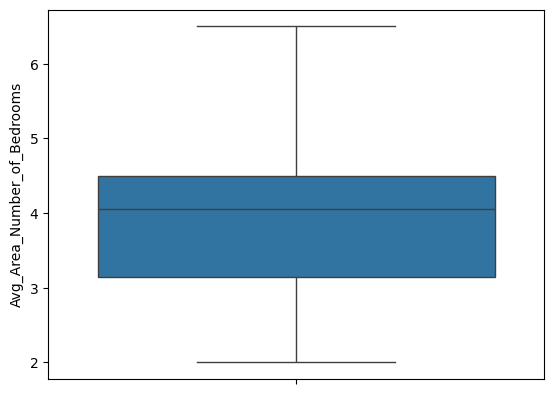

In [33]:
sns.boxplot(y = 'Avg_Area_Number_of_Bedrooms' , data=USAHOUSING)
plt.show()

# FILLING OF MISSING VALUES

In [35]:
USAHOUSING['Avg_Area_Income'] = USAHOUSING['Avg_Area_Income'].fillna(USAHOUSING['Avg_Area_Income'].median())

In [36]:
USAHOUSING['Avg_Area_Number_of_Rooms'] = USAHOUSING['Avg_Area_Number_of_Rooms'].fillna(USAHOUSING['Avg_Area_Number_of_Rooms'].median())

In [37]:
USAHOUSING['Avg_Area_Number_of_Bedrooms'] = USAHOUSING['Avg_Area_Number_of_Bedrooms'].fillna(USAHOUSING['Avg_Area_Number_of_Bedrooms'].median())

In [38]:
USAHOUSING.isnull().sum()

Avg_Area_Income                0
Avg_Area_House_Age             0
Avg_Area_Number_of_Rooms       0
Avg_Area_Number_of_Bedrooms    0
Area_Population                0
Price                          0
Address                        0
dtype: int64

In [39]:
USAHOUSING.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,962
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,863
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,4069
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4794
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,4736


# DROPING A COLUMN

### USAHOUSING = USAHOUSING.drop(columns=['Address']) #Method-1
### USAHOUSING = USAHOUSING.iloc[:,0:-1]  #-1 means last column #Method-2

In [42]:
USAHOUSING = USAHOUSING.iloc[:,0:-1] #Method-2 #-1 means last column

In [43]:
USAHOUSING.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [44]:
#Distribution plots

In [45]:
def distplots(col):
    sns.distplot(USAHOUSING[col])
    plt.show()

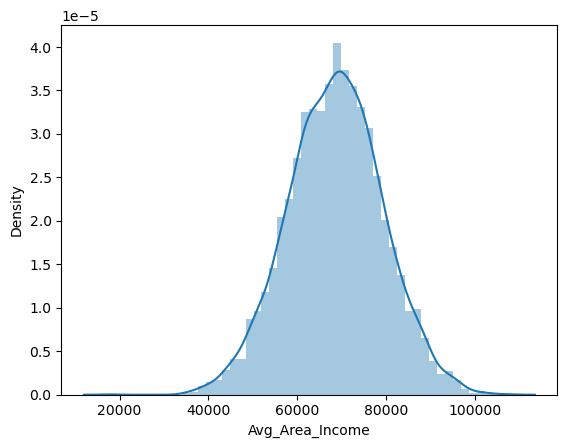

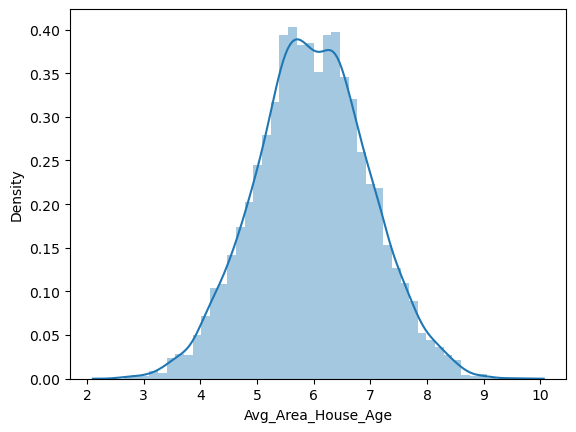

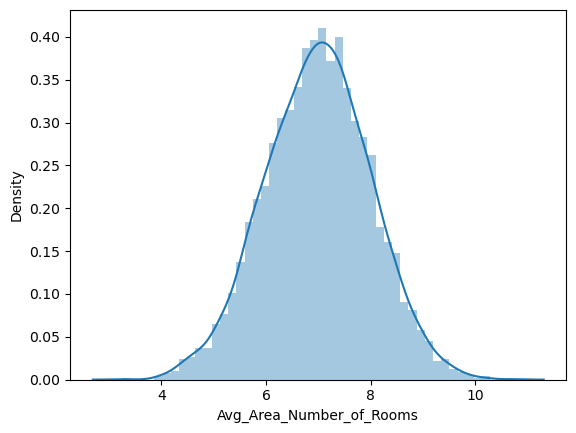

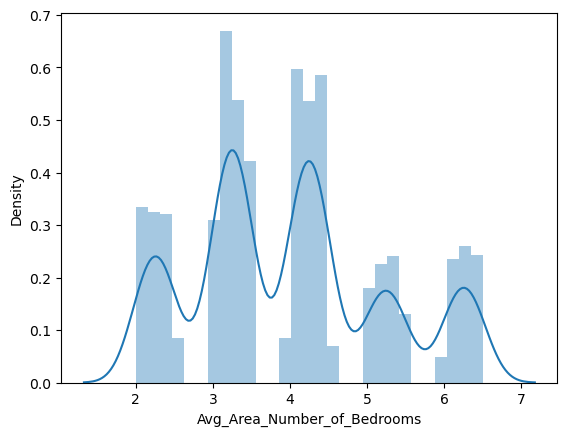

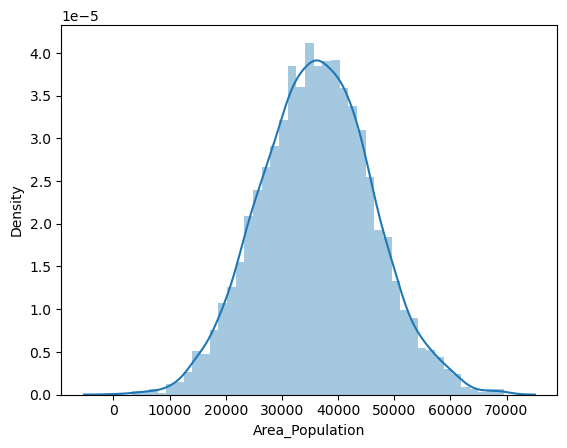

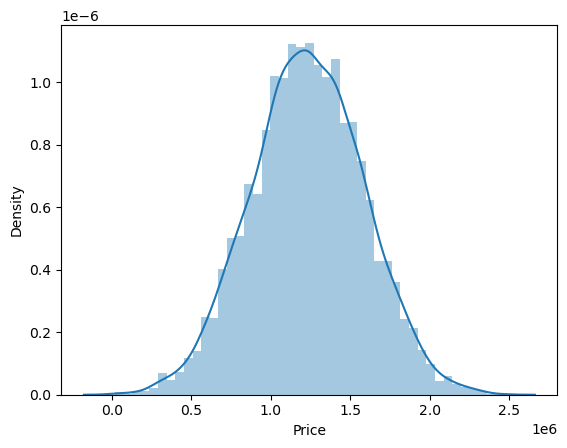

In [46]:
for i in list(USAHOUSING.columns)[0:]:
    distplots(i)

In [47]:
#To view the outliers we use boxplot

In [48]:
def boxplots(col):
        sns.boxplot(USAHOUSING[col])
        plt.xlabel(col)
        plt.show()

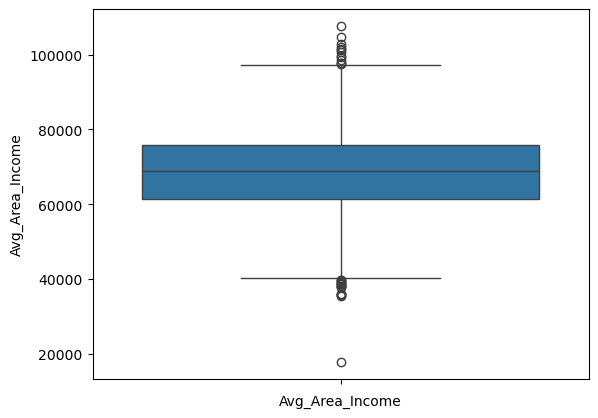

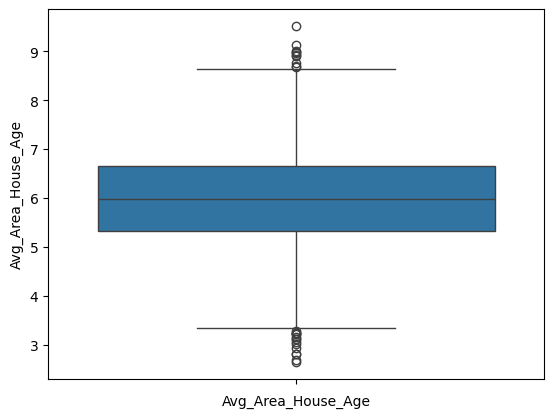

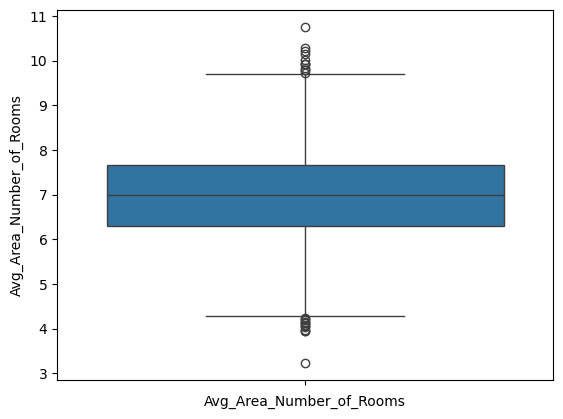

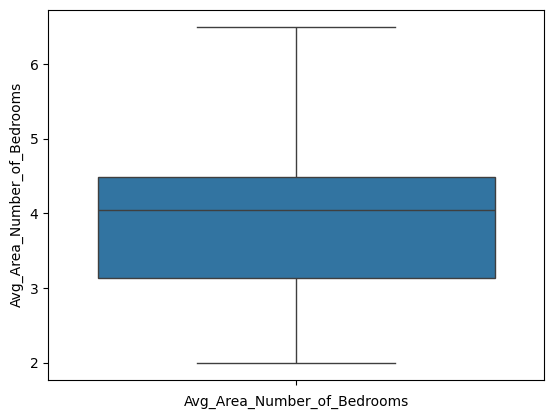

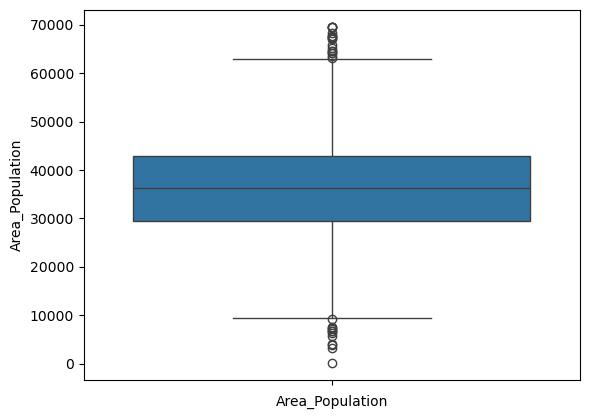

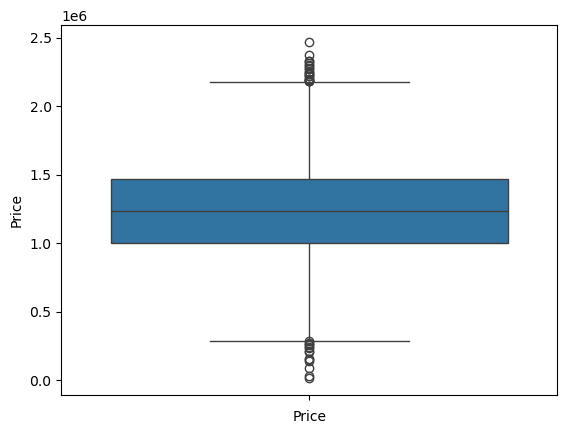

In [49]:
for i in list(USAHOUSING.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

### -->FIND Q1.Q3,IQR, UPPER LIMIT, LOWER LIMIT to handle outliers

In [50]:
Q1= USAHOUSING.quantile(0.25)
Q3= USAHOUSING.quantile(0.75)
IQR=Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR


In [51]:
print('Q1')
print(Q1)
print('*****'*5)
print('Q3')
print(Q3)
print('*****'*5)
print('IQR')
print(IQR)
print('*****'*5)
print('Upper_limit')
print(Upper_limit)
print('*****'*5)
print('Lower_limit')
print(Lower_limit)
print('*****'*5)

Q1
Avg_Area_Income                 61485.150192
Avg_Area_House_Age                  5.322283
Avg_Area_Number_of_Rooms            6.299692
Avg_Area_Number_of_Bedrooms         3.140000
Area_Population                 29403.928700
Price                          997577.135075
Name: 0.25, dtype: float64
*************************
Q3
Avg_Area_Income                7.576652e+04
Avg_Area_House_Age             6.650808e+00
Avg_Area_Number_of_Rooms       7.665281e+00
Avg_Area_Number_of_Bedrooms    4.490000e+00
Area_Population                4.286129e+04
Price                          1.471210e+06
Name: 0.75, dtype: float64
*************************
IQR
Avg_Area_Income                 14281.368910
Avg_Area_House_Age                  1.328525
Avg_Area_Number_of_Rooms            1.365589
Avg_Area_Number_of_Bedrooms         1.350000
Area_Population                 13457.362070
Price                          473633.069425
dtype: float64
*************************
Upper_limit
Avg_Area_Income            

### -->CREATING A COPY OF THE DATASET

In [52]:
New_USAHOUSING= USAHOUSING.copy()

In [53]:
New_USAHOUSING.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

### -->USE CAPPING MEHTOD TO HANDLE OUTLIER IN

In [54]:
Income_Q1 = New_USAHOUSING['Avg_Area_Income'].quantile(0.25)
Income_Q3 = New_USAHOUSING['Avg_Area_Income'].quantile(0.75)
Income_IQR=Income_Q3-Income_Q1
Income_Upper=Income_Q3+1.5*Income_IQR
Income_Lower=Income_Q1-1.5*Income_IQR

In [55]:
New_USAHOUSING['Avg_Area_Income'] = np.where(
    New_USAHOUSING['Avg_Area_Income'] > Income_Upper, Income_Upper,
    np.where(
        New_USAHOUSING['Avg_Area_Income'] < Income_Lower, Income_Lower,
        New_USAHOUSING['Avg_Area_Income']
    )
)

In [56]:
Age_Q1 = New_USAHOUSING['Avg_Area_House_Age'].quantile(0.25)
Age_Q3 = New_USAHOUSING['Avg_Area_House_Age'].quantile(0.75)
Age_IQR = Age_Q3 - Age_Q1

Age_Upper = Age_Q3 + 1.5 * Age_IQR
Age_Lower = Age_Q1 - 1.5 * Age_IQR



In [57]:
New_USAHOUSING['Avg_Area_House_Age'] = np.where(
    New_USAHOUSING['Avg_Area_House_Age'] > Age_Upper, Age_Upper,
    np.where(
        New_USAHOUSING['Avg_Area_House_Age'] < Age_Lower, Age_Lower,
        New_USAHOUSING['Avg_Area_House_Age']
    )
)

In [58]:
Number_of_Rooms_Q1 = New_USAHOUSING['Avg_Area_Number_of_Rooms'].quantile(0.25)
Number_of_Rooms_Q3 = New_USAHOUSING['Avg_Area_Number_of_Rooms'].quantile(0.75)
Number_of_Rooms_IQR = Number_of_Rooms_Q3 - Number_of_Rooms_Q1
Number_of_Rooms_Upper =Number_of_Rooms_Q3 + Number_of_Rooms_IQR*1.5
Number_of_Rooms_Lower = Number_of_Rooms_Q1 - Number_of_Rooms_IQR*1.5

In [59]:
New_USAHOUSING['Avg_Area_Number_of_Rooms'] = np.where(New_USAHOUSING['Avg_Area_Number_of_Rooms']>Number_of_Rooms_Upper,Number_of_Rooms_Upper, 
                                              np.where(New_USAHOUSING['Avg_Area_Number_of_Rooms']<Number_of_Rooms_Lower ,Number_of_Rooms_Lower ,
                                                       New_USAHOUSING['Avg_Area_Number_of_Rooms']))

In [60]:
Population_Q1 = New_USAHOUSING['Area_Population'].quantile(0.25)
Population_Q3 = New_USAHOUSING['Area_Population'].quantile(0.75)
Population_IQR = Population_Q3 - Population_Q1
Population_Upper =Population_Q3 + Population_IQR*1.5
Population_Lower = Population_Q1 - Population_IQR*1.5

In [61]:
New_USAHOUSING['Area_Population'] = np.where(New_USAHOUSING['Area_Population']>Population_Upper,Population_Upper, 
                                              np.where(New_USAHOUSING['Area_Population']<Population_Lower ,Population_Lower ,
                                                       New_USAHOUSING['Area_Population']))

In [62]:
New_USAHOUSING.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,3.981956,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,1.233758,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,2.000000,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,6.500000,63047.333875,2.469066e+06


In [63]:
USAHOUSING.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.145895,5.977222,6.987708,3.981956,36163.516039,1.232073e+06
std,10640.538021,0.991456,1.005435,1.233758,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


### ---> Again check the outliers

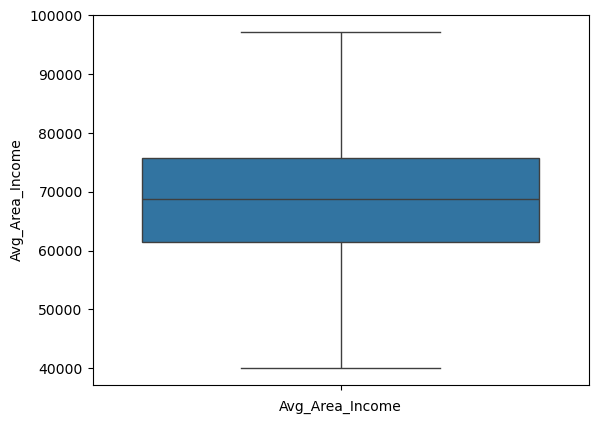

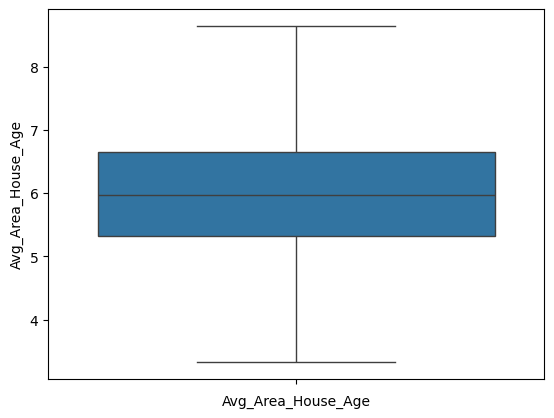

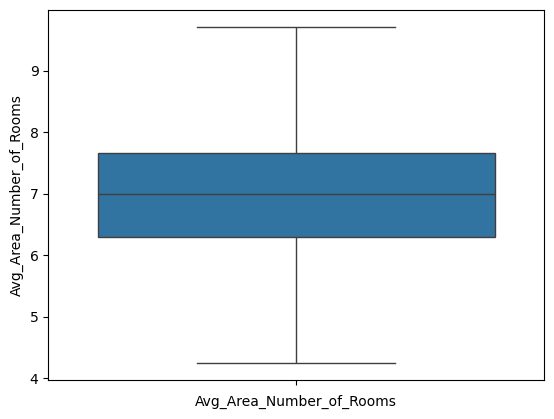

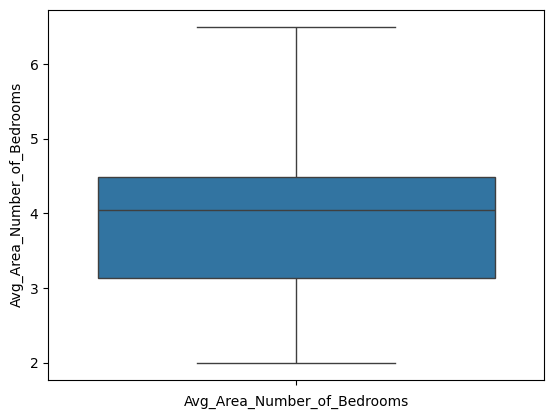

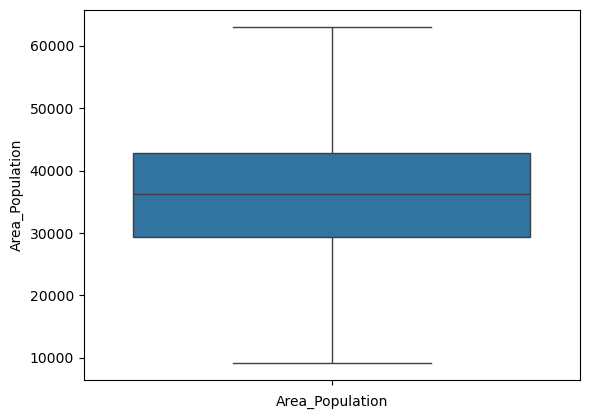

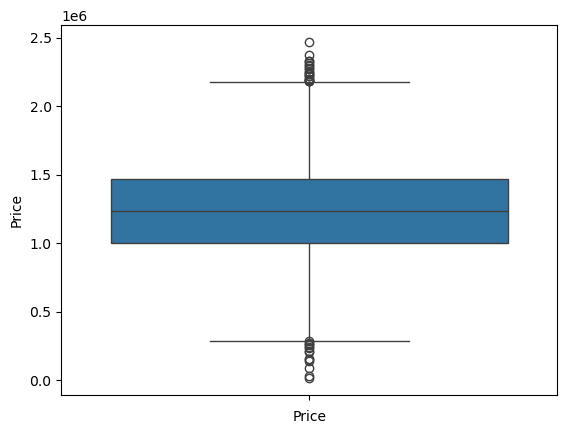

In [65]:
def boxplots(col):
    sns.boxplot(New_USAHOUSING[col])
    plt.xlabel(col)
    plt.show()

for i in list(New_USAHOUSING.select_dtypes(exclude =['object']).columns)[0:]:
    boxplots(i)

#### ---->>> FEATURE SCALING: Very important while using graident descent approach how ever give poor result with OLS approach.
#### ----> Distance-based algorithms (e.g., KNN, SVM) perform better with scaled features because they compute distances based on feature values. 
#### ----> If the features are on different scales, the algorithm might bias towards features with larger scales.
#### -Feature scaling is a crucial preprocessing step in machine learning that transforms the features of your data so that they are on a similar scale.
#### ---->This can improve the performance and convergence speed of many algorithms.
#### ----->ONLY WITH INDEPENDENT VARIABLE
#### ----->FIRST SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLE


In [66]:
x = New_USAHOUSING.iloc[:,0:-1]
y = New_USAHOUSING['Price']

#### ----->>>> Another approach to split 
#### -----> x = New_USAHOUSING.drop('Price',axis = 1)
#### ------> y = New_USAHOUSING[['Price']]

In [67]:
x.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [68]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

#### ------> Understanding fit(), transform(), and fit_transform()
#### -----> fit(X):
This method computes the parameters (such as mean and standard deviation in the case of standard scaling) required for the transformation.
For example, if you are using StandardScaler from scikit-learn, fit() calculates the mean and standard deviation of the dataset X.

#### -----> transform(X):
This method applies the transformation using the parameters computed by fit().
For StandardScaler, transform() uses the mean and standard deviation computed during fit() to standardize the dataset X.

#### -----> fit_transform(X):
This method combines the two steps. It first computes the parameters using fit(), and then applies the transformation using transform().
It is a convenient way to perform both operations in one step.

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087582,-1.325622
1,1.008309,0.025747,-0.256381,-0.723031,0.407049
2,-0.690457,-0.113082,1.523179,0.930619,0.073326
3,-0.495800,1.226822,-1.398967,-0.585227,-0.187484
4,-0.813869,-0.949376,0.850726,0.201068,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423104,-1.350917
4996,0.936679,1.035210,-0.410236,0.030839,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501219,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181909,0.655755


#### -----> Find Correlation to check multicolinearity.
#### -----> if value is greater than 0.75 or 0.8, drop than column. As it is highly corelated
#### -----> If any of two independent variables have same value than drop any one with discussion by SME. As it leads to multicolinearity.
#### -----> In classification problem no need to check multicolinearity.

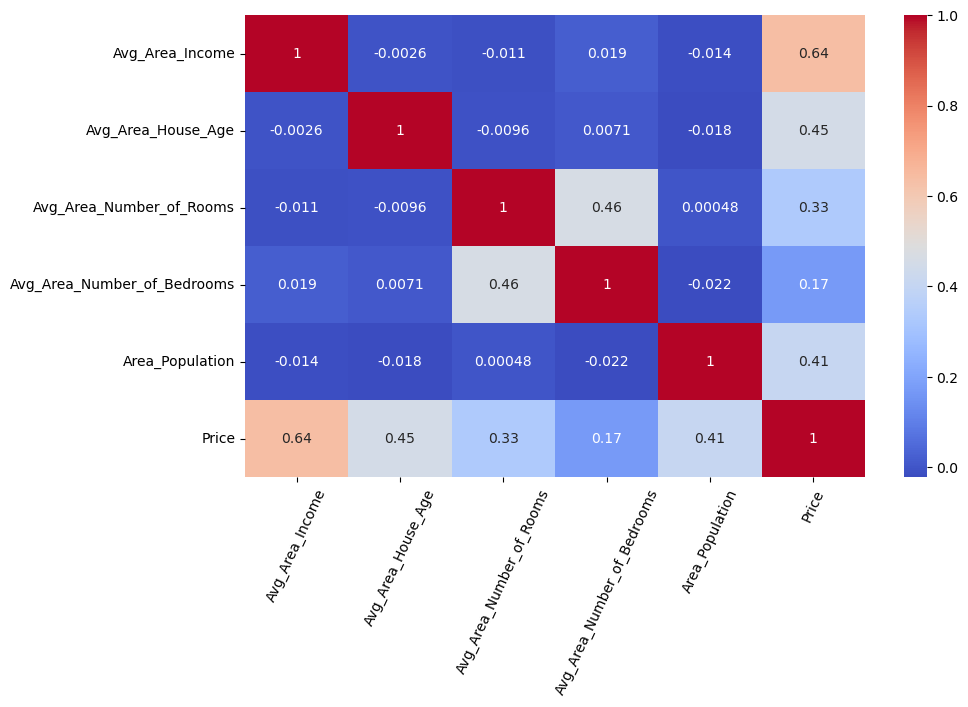

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
corr = New_USAHOUSING.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Create a heatmap with annotations and a 'coolwarm' color map
plt.xticks(rotation=65)  # Rotate x-axis labels by 65 degrees
plt.show()  # Display the plot


#### ----->  Variance_Inflation_Factor(VIF) is another approach to check multicolinearity other than heat map
#### -----> VIF- Variance Inflation Factor to check multicolinearity
#### ------> VIF should be <= 5
#### ------> VIF = 1/(1-R*2) # Also called coefficient of determination

In [71]:
variable = sc_x
variable.shape

(5000, 5)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['Variance_Inflation_Factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x.columns


In [73]:
vif

,Variance_Inflation_Factor,Features
0,1.001067,Avg_Area_Income
1,1.000593,Avg_Area_House_Age
2,1.274864,Avg_Area_Number_of_Rooms
3,1.275727,Avg_Area_Number_of_Bedrooms
4,1.001144,Area_Population


#### ----->>>> Since for any variable VIF is less than 5 so there is no multicolinearity. So one Assumption satisified.
#### ----->  SPLIT THE DATA INTO TRAINING AND TEST for model building and prediction

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 101)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


#### ------> BUILD THE MODEL

#### -----> APPROACH 1 : Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [76]:
print(lm.intercept_)
print('*****************')
print(lm.coef_)

-2657921.4464064403
*****************
[2.17329557e+01 1.65690136e+05 1.21587070e+05 1.72620828e+03
 1.53020327e+01]


### -----> We can also use following approach to find coefficient

In [77]:
for idx, column in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(column, lm.coef_[idx]))


The coefficient for Avg_Area_Income is 21.73295574240053
The coefficient for Avg_Area_House_Age is 165690.13648624113
The coefficient for Avg_Area_Number_of_Rooms is 121587.06965741955
The coefficient for Avg_Area_Number_of_Bedrooms is 1726.2082822171615
The coefficient for Area_Population is 15.302032682194413


In [78]:
x.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population'],
      dtype='object')

#### ----->The basic linear regression equation with intercept and coeffcient will be as:( just for information)
#### price = interept+ slope1*Avg_Area_Income +slope2*Avg_Area_House_Age+ slope3*Avg_Area_Number_of_Rooms+ slope4*Avg_Area_Number_of_Bedrooms+ slope5*Area_Population  

## ----->>>>> Prediction of price for tets and train

In [79]:
y_pred_price = lm.predict(x_test)

In [80]:
y_pred_price

array([1258771.5463026 ,  821509.83414795, 1743523.44944721, ...,
       1117250.31198154,  718622.6849011 , 1518227.0729471 ])

In [81]:
y_pred_price_train = lm.predict(x_train)

In [82]:
y_pred_price_train

array([ 975014.89364707, 1005966.9725081 , 1311481.65188279, ...,
        973733.51952591,  922475.53232175, 2133370.06333554])

In [83]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1881    1.727211e+06
2800    1.707270e+06
1216    1.167450e+06
1648    7.241217e+05
3063    1.561234e+06
Name: Price, Length: 1250, dtype: float64

### ------>>>> VALIDATION for train and test using R2 score

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_price)

0.9136249997379438

In [85]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_price_train)

0.9165094280297815

### -->Since R2 score for training and testing are very close therfore no overfitting or underfitting issue. 

# -APPROACH 2:  OLS Method

In [86]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [87]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model = smf.OLS(endog = y_train,exog = x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.011e+04
Date:                Sun, 22 Jun 2025   Prob (F-statistic):                        0.00
Time:                        13:08:36   Log-Likelihood:                         -51812.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Avg_Area_Income                10.2091      0.314     32.560      0.000       9.594      10.824
Avg_Area_House_Age           4.916e+04   3478.628     14.131      0.000    4.23e+04     5.6e+04
Avg_Area_Number_of_Rooms     -1.09e+04   3801.792     -2.868      0.004   -1.84e+04   -3448.582
Avg_Area_Number_of_Bedrooms  5109.5344   3631.219      1.407      0.159   -2009.825    1.22e+04
Area_Population                 8.5764      0.382     22.429      0.000       7.827       9.326
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.258
Skew:                          -0.000   Prob(JB):                        0.879
Kurtosis:                       2.959   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ------>  Interesting Finding
### Scaling or originality of data does not influence R2 score for linear regression
### But severely affect the R2 in OLS approach.
### Scaling reduce the R2 score abruptly.
###  In ols method we can check Adj R2 sccore
### we can check P value
### we can check Durbin Watson Test value to check Autocolinearity: change in variable with time
### DWT < 2 = +ve autocolrelation
### DWT > 2 = -ve auto corelation
### DWT = 2 = no auto  corelation
### If DWT lies between 1.5 to 2.5 model is acceptable else go for timeseries appraoach.


###  ----->> There is another assumption data should be linear. Let us check linearity using scatter plot

In [93]:
plt.scatter(y_test,y_pred_price)

### ---->>>There is another assumption normality of residual . Let us check normality of residual

In [94]:
Residual  = y_test-y_pred_price

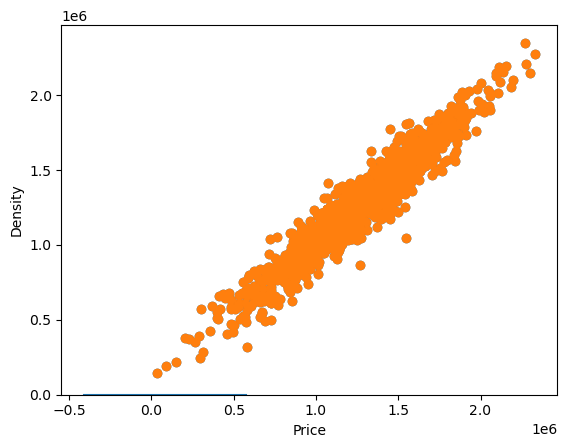

In [95]:
sns.distplot((Residual),bins = 50)
plt.show()

## ---->> Conclude the model
### ---> Adj R2 score = 0.96
### --->All variable have p value less than 5% except the variable number of bedrooms.So drop it and do it again
### --->linearity  satisfied
### --->Normality of Residual satisifed
###  ---->Homosedasticity satisified
### ---->No autocorelation satisfied
### ---->No or little multicolinearity satisfied
### ---->No endoginity satified
### ---->sklearn linear regrssion model is a machine learning approach
### ---->OLS is a statistical appraoch


# APPROACH 3
### ----> Regularization: It is a shrinkage method the algortihm while trying to find best combination of coeffcient vlaue 
#### ----> which minimize SSE on training data by penality on higher coefficent value to reduce the error.
### ----> Ridge also callled L2 ; Close to zero
### ----> Lasso also called L1: Either zero or close to zero(Sparsity)
### ----> Most popular is ridge
###  -----> ElastiNet L1+L2 (Rarely used)
### ------> lasso based on absolute value which can not be differentiated.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [97]:
# PART 1 lasso 
# penality preferred = 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
print("Lasso Model :",(lasso.coef_))


Lasso Model : [2.17329556e+01 1.65690031e+05 1.21586986e+05 1.72617492e+03
 1.53020326e+01]


In [98]:
lasso.intercept_

-2657920.094517281

In [99]:
# Part2 Ridge
# penality preferred = 0.3
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train,y_train)
print("ridge model",ridge.coef_)

ridge model [2.17329254e+01 1.65675916e+05 1.21574274e+05 1.73113927e+03
 1.53020563e+01]


In [100]:
ridge.intercept_

-2657765.4841408585

In [101]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [102]:
print("Training Accuracy:", r2_score(y_train, y_pred_train_ridge))
print("Test Accuracy:", r2_score(y_test, y_pred_test_ridge))    

Training Accuracy: 0.91650942552207
Test Accuracy: 0.9136246738265379


In [103]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [104]:
print("Training Accuracy:", r2_score(y_train, y_pred_train_lasso))
print("Test Accuracy:", r2_score(y_test, y_pred_test_lasso))    

Training Accuracy: 0.9165094280296036
Test Accuracy: 0.9136249987893023


# Performance matrix

In [105]:
# Mean Absolute Error
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test,y_pred_price))

MAE 83116.30244093633


In [106]:
# Mean Absolute percent Error (MAPE)

print("MAPE:",metrics.mean_absolute_error(y_test,y_pred_price)/100)


MAPE: 831.1630244093633


In [107]:
# Mean Squared Error

print("MSE:",metrics.mean_squared_error(y_test,y_pred_price))

MSE: 10794362043.07749


In [108]:
# Root Mean Squared Error

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_price)))

RMSE: 103895.91928019834


# Approach 4
### -----> Gradient Descent : Iterate the model with concept of forward and backward propagation. for finding value of 
### slope and intercept and if not good, go backward to adjust them and remodel.
### ----> IN GD we need to use scaled data.

In [109]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test = train_test_split(sc_x,y,test_size = 0.25,random_state = 101)
print(x_train1.shape,x_test1.shape,y_train.shape,y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


In [110]:
from sklearn.linear_model import SGDRegressor

In [111]:
gd_model = SGDRegressor()
gd_model.fit(x_train1,y_train)

SGDRegressor()

### ----> SGDRegressor(alpha=0.0001,,max_iter=1000,tol=0.001,learning_rate='adaptive',eta0=0.01,,n_iter_no_change=5)
## ---> Key Parameters for Tuning SGDRegressor
1. alpha: Constant that multiplies the regularization term. Also known as the regularization strength; must be a positive float.
Typical values: [0.0001, 0.001, 0.01, 0.1, 1, 10]

2. learning_rate: The learning rate schedule. 
Options include:
'constant': eta = eta0
'optimal': eta = 1.0 / (t + t0)
'invscaling': eta = eta0 / pow(t, power_t)
'adaptive': eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5.

3. eta0: The initial learning rate for the ‘constant’, ‘invscaling’, or ‘adaptive’ schedules.
Typical values: [0.0001, 0.001, 0.01, 0.1, 1]

4. max_iter: The maximum number of passes over the training data (epochs).
Typical values: [1000, 5000, 10000]

5.tol: The stopping criterion. If it is not None, the iterations will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.
Typical values: [1e-3, 1e-4, 1e-5]

6. penalty: The penalty (regularization term) to be used. Options include:
'none'
'l2'
'l1'

7.n_iter_no_change: Number of iterations with no improvement to wait before early stopping.
Typical values: [5, 10]

In [112]:
#learning_rate='adaptive', eta0=0.01, max_iter=10000, tol=1e-3

In [113]:
y_pred_gd_train = gd_model.predict(x_train1)
y_pred_gd_test = gd_model.predict(x_test1)

In [114]:
print("GD TRAINING ACCURACY:",r2_score(y_train,y_pred_gd_train))

GD TRAINING ACCURACY: 0.9164763745520359


In [115]:
print("GD TEST ACCURACY:",r2_score(y_test,y_pred_gd_test))

GD TEST ACCURACY: 0.9135301146442114


## Model saving


In [116]:
import joblib

In [117]:
# Save Linear Regression model
joblib.dump(lm, 'linear_regression_model.pkl')
print('lm saved as linear_regression_model.pkl')

# Save Ridge Regression model
joblib.dump(ridge, 'ridge_model.pkl')
print('ridge saved as ridge_model.pkl')

# Save Lasso Regression model
joblib.dump(lasso, 'lasso_model.pkl')
print('lasso saved as lasso_model.pkl')

# Save SGD Regressor model
joblib.dump(gd_model, 'sgd_model.pkl')
print('gd_model saved as sgd_model.pkl')


lm saved as linear_regression_model.pkl
ridge saved as ridge_model.pkl
lasso saved as lasso_model.pkl
gd_model saved as sgd_model.pkl
